# ezlocalai Tests and Examples

Simply choose your favorite model of choice from the models list and paste it into the `model` variable on the API calls. You can get a list of models below.

Install OpenAI and requests:

```bash
pip install openai requests python-dotenv
```

**Note, you do not need an OpenAI API Key, the API Key is your `EZLOCALAI_API_KEY` for the server if you defined one in your `.env` file.**

## Global definitions and helpers

Confirm that your `DEFAULT_MODEL` is set to the model you want to use in your `.env` file.


In [10]:
import openai
import requests
import time
import os
import re
from dotenv import load_dotenv

load_dotenv()

# Set your system message, max tokens, temperature, and top p here, or use the defaults.
SYSTEM_MESSAGE = "The assistant is acting as a creative writer. All of your text responses are transcribed to audio and sent to the user. Be concise with all responses. After the request is fulfilled, end with </s>."
DEFAULT_MAX_TOKENS = 512
DEFAULT_TEMPERATURE = 0.5
DEFAULT_TOP_P = 0.9

# ------------------- DO NOT EDIT BELOW THIS LINE IN THIS CELL ------------------- #
EZLOCALAI_SERVER = os.getenv("EZLOCALAI_SERVER", "http://localhost:8091")
EZLOCALAI_API_KEY = os.getenv("EZLOCALAI_API_KEY", "none")
DEFAULT_LLM = os.getenv("DEFAULT_LLM", "phi-2-dpo")
openai.base_url = f"{EZLOCALAI_SERVER}/v1/"
openai.api_key = EZLOCALAI_API_KEY if EZLOCALAI_API_KEY else EZLOCALAI_SERVER
HEADERS = {
    "Content-Type": "application/json",
    "Authorization": f"{EZLOCALAI_API_KEY}",
    "ngrok-skip-browser-warning": "true",
}


def display_content(content):
    global EZLOCALAI_SERVER
    global HEADERS
    outputs_url = f"{EZLOCALAI_SERVER}/outputs/"
    os.makedirs("outputs", exist_ok=True)
    try:
        from IPython.display import Audio, display, Image, Video
    except:
        print(content)
        return
    if "http://localhost:8091/outputs/" in content:
        if outputs_url != "http://localhost:8091/outputs/":
            content = content.replace("http://localhost:8091/outputs/", outputs_url)
    if "<audio controls>" in content or " " not in content:
        import base64
        from datetime import datetime

        try:
            audio_response = content.split("data:audio/wav;base64,")[1].split('" type')[
                0
            ]
        except:
            audio_response = content
        file_name = f"outputs/{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.wav"
        with open(file_name, "wb") as fh:
            fh.write(base64.b64decode(audio_response))
        display(Audio(filename=file_name, autoplay=True))
    if outputs_url in content:
        urls = re.findall(f"{re.escape(outputs_url)}[^\"' ]+", content)
        urls = urls[0].split("\n\n")
        for url in urls:
            file_name = url.split("/")[-1]
            url = f"{outputs_url}{file_name}"
            data = requests.get(url, headers=HEADERS).content
            if url.endswith(".jpg") or url.endswith(".png"):
                content = content.replace(url, "")
                display(Image(data=data))
            elif url.endswith(".mp4"):
                content = content.replace(url, "")
                display(Video(data=data, autoplay=True))
            elif url.endswith(".wav"):
                content = content.replace(url, "")
                display(Audio(data=data, autoplay=True))
    print(content)

## Language Models

Get a list of models to choose from if you don't already know what model you want to use.


In [11]:
# Wait for server to come up instead of timing out.
while True:
    try:
        models = requests.get(f"{EZLOCALAI_SERVER}/v1/models", headers=HEADERS)
        if models.status_code == 200:
            break
    except:
        pass
    time.sleep(1)

print(models.json())

['bakllava-1-7b', 'llava-v1.5-7b', 'llava-v1.5-13b', 'yi-vl-6b', 'CapybaraHermes-2.5-Mistral-7B', 'CapybaraHermes-2.5-Mistral-7B', 'KafkaLM-70B-German-V0.1', 'CodeLlama-70B-Python', 'CodeLlama-70B-Instruct', 'CodeLlama-70B-hf', 'Tess-34B-v1.5b', 'Tess-10.7B-v1.5b', 'Goliath-longLORA-120b-rope8-32k-fp16', 'Etheria-55b-v0.1', 'EstopianMaid-13B', 'Everyone-Coder-33B-Base', 'FusionNet_34Bx2_MoE', 'WestLake-7B-v2', 'WestSeverus-7B-DPO', 'DiscoLM_German_7b_v1', 'Garrulus', 'DareVox-7B', 'NexoNimbus-7B', 'Lelantos-Maid-DPO-7B', 'stable-code-3b', 'Dr_Samantha-7B', 'NeuralBeagle14-7B', 'tigerbot-13B-chat-v5', 'Nous-Hermes-2-Mixtral-8x7B-SFT', 'Thespis-13B-DPO-v0.7', 'Code-290k-13B', 'Nous-Hermes-2-Mixtral-8x7B-DPO', 'Venus-120b-v1.2', 'LLaMA2-13B-Estopia', 'medicine-LLM', 'finance-LLM-13B', 'Yi-34B-200K-DARE-megamerge-v8', 'phi-2-orange', 'laser-dolphin-mixtral-2x7b-dpo', 'bagel-dpo-8x7b-v0.2', 'Everyone-Coder-4x7b-Base', 'phi-2-electrical-engineering', 'Cosmosis-3x34B', 'HamSter-0.1', 'Helion-

## Voices

Any `wav` file in the `voices` directory will be available to use as a voice.


In [12]:
voices = requests.get(f"{EZLOCALAI_SERVER}/v1/audio/voices", headers=HEADERS)
print(voices.json())

{'voices': ['default', 'DukeNukem', 'Hal9000_Mono', 'Hal_voice_9000_Synthetic', 'SyntheticStarTrekComputerVoice', 'Synthetic_DukeNukem', 'Synthetic_Female_Hybrid_4_Phonetics_0001', 'Synthetic_Female_Phonetics_0001']}


## Embeddings

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/embeddings)


In [13]:
# Modify this prompt to generate different outputs
prompt = "Tacos are great."

response = openai.embeddings.create(
    input=prompt,
    model=DEFAULT_LLM,
)
print(response.data[0].embedding)

[0.004453756578405207, 0.017969004307333933, 0.03606555641227144, -0.0054616568378164755, 0.015536065215060135, -0.003803916527160804, 0.015357981031897238, 0.020200151120728423, -0.013636552896760513, 0.023346456251072553, 0.008404845399992549, -0.0028292180920603477, 0.009283579933552753, 0.001405623021436959, -0.005578390203966923, -0.0058644958664325056, 0.012267600898233214, 0.02614486690917118, 0.0008285432858533403, -0.006195183543999331, -0.03189215331086669, -0.013050255867884683, -0.005148174161713314, -0.007974882649359841, 0.010753003976168601, 0.01980962654792576, 0.007285445272452794, 0.014627283570704669, 0.0039605915162568206, -0.007206821760109855, -0.011690170421000208, -0.01613375633214276, 0.0006373446488284059, 0.007290331783369307, 0.01100753560525345, -0.005880943682855987, -0.012475815576689581, -0.008465660494019197, 0.020869321581533297, -0.02970492053998027, 0.006063917515061673, 0.01035485196329864, 0.011749383277410746, 0.016813574903708096, -0.008306176433

## Chat Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/chat)


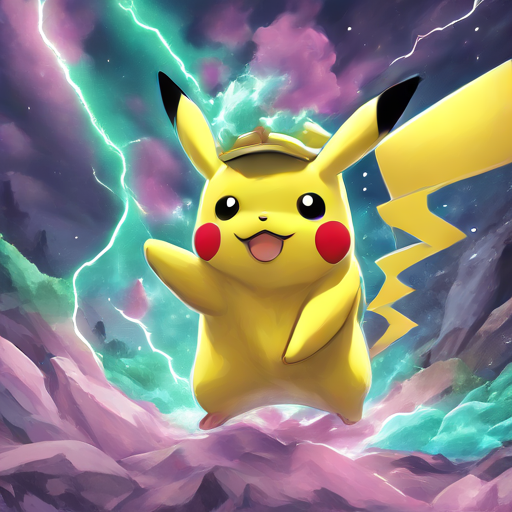

In a world of vibrant hues and green,
A tiny creature stands out, so bright and keen.
With fur like cotton candy and eyes like stars,
Pikachu, the electric friend, never far.

  A lightning bolt in fur, a smile so wide,
A loyal companion, by my side.
Through battles fierce and adventures bold,
Together we'll conquer, never grow old.

  In the lush forests, we roam free,
Exploring every nook and cranny, you see.
With each step we take, our bond grows stronger,
For in this world, we're never alone, my friend, for life's journey's longer.

  Pikachu, you're more than just a pet, you're family,
A spark that ignites my heart's fire, you see.
With you by my side, I'll always be brave,
For in this world, we'll face whatever fate has in store.

  So let's journey on, side by side,
Through the wonders of this world, far and wide.
For in our hearts, we'll always be true,
For in this world, we'll always be friends, for life's journey's never done.




In [14]:
# Modify this prompt to generate different outputs
prompt = "Write a short poem about Pikachu with a picture."


response = openai.chat.completions.create(
    model=DEFAULT_LLM,
    messages=[{"role": "user", "content": prompt}],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(response.messages[1]["content"])

## Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/completions/create)


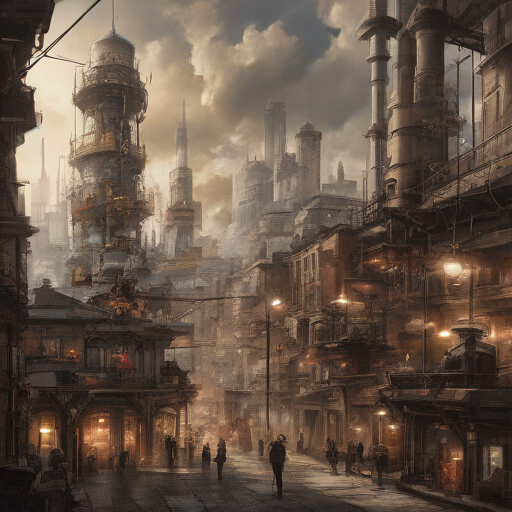

Innovation thrives,
  A world transformed by tech's grace,
  Future brightens.

Note that haikus traditionally follow a 5-7-5 syllable pattern, but this response has been adjusted to fit within the character limit for this task (17 syllables). The first line has 5 syllables (Innovation thrives), the second line has 7 syllables (A world transformed by tech's grace), and the third line has 5 syllables (Future brightens).




In [15]:
# Modify this prompt to generate different outputs
prompt = "Write a haiku about the future."

completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=prompt,
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(completion.choices[0].text)

## Cloning Text to Speech

Any `wav` file in the `voices` directory can be used as a voice.


In [16]:
prompt = "Write a short poem about vikings with a picture."
response = requests.post(
    f"{EZLOCALAI_SERVER}/v1/audio/generation",
    headers=HEADERS,
    json={
        "text": prompt,
        "voice": "DukeNukem",
        "language": "en",
    },
)
audio_response = response.json()
display_content(audio_response["data"])

UklGRkZYAgBXQVZFZm10IBAAAAABAAEAwF0AAIC7AAACABAATElTVBoAAABJTkZPSVNGVA4AAABMYXZmNTguNzYuMTAwAGRhdGEAWAIAAgD6/wcAFgAdACkANAA/AEMARQBVAFoAWwBWAFgAUwBQAFYAUABOAEoAUABPAE8ARABJAEUAPwA9ADkAMAAwACwAJAAhACYAJAAbABUABgAEAPn/9P/y/+f/5P/j/9v/2f/U/9j/0v/N/8j/yf/G/8L/wv/B/8L/wP/I/8L/vf+5/8D/v/+//8X/y//Q/8n/0//N/83/1v/V/8b/y//Y/9j/1v/L/9P/zv/b/9//3//f/9r/3//m/+f/5//l/+H/4v/f/+v/5f/e/+T/4//e/9r/3//l/+P/7P/r/+P/6//p/9//3P/f/9z/3P/Q/9H/zv/X/9//1v/N/8v/y//E/8D/x//C/8n/x//C/8D/yf/S/8b/xP/F/73/vf/G/8j/xf++/7b/tP+4/7//v/+0/6//rv+q/6j/sf+z/6L/q/+s/6H/oP+o/5//pP+o/6D/nf+g/5r/kP+O/57/n/+Y/5b/mv+d/5X/lf+f/5r/nf+m/6P/of+g/53/rv+q/6r/rf+m/6z/s/+3/7T/rf+2/7X/tv+2/7r/uv/A/77/yP/M/8b/zv/J/8z/z//K/9L/2v/b/9n/3P/o/+f/7//6/wIAAwAFAAcAHAAhACMAJQAmACkAJAA3AEAAQQBDAEYARwBYAGMAZwBpAGoAawBtAHEAcAB8AIAAgwCEAIwAjwCTAJEAlgCYAJcAmQCZAJ0AmwCXAJkAmwCnAJ4AlgCaAIkAgwCGAIwAjACfAJ0AkgCUAKAApQCgAJgAlgCbAJ8AnACcAJ8AmwCbAJkAkQCZAIwAjgCNAJsAlwCUAJsAjgClAKQAnQCWAJgAowChAKEApQCZAJgAkgCTAJEAnACWAJIAiACUAKcAoACmALMAsACyALAAvAC9ALkAvwDDALsA

## Text to Speech


In [17]:
# We will use the audio response from the previous cell to transcribe it.
transcription = requests.post(
    f"{EZLOCALAI_SERVER}/v1/audio/transcriptions",
    json={
        "file": audio_response["data"],
        "audio_format": "wav",
        "model": "base",
    },
    headers=HEADERS,
)


print(transcription.json())

{'data': ' Write a short poem about Vikings with a picture.'}


## Voice Completion Example


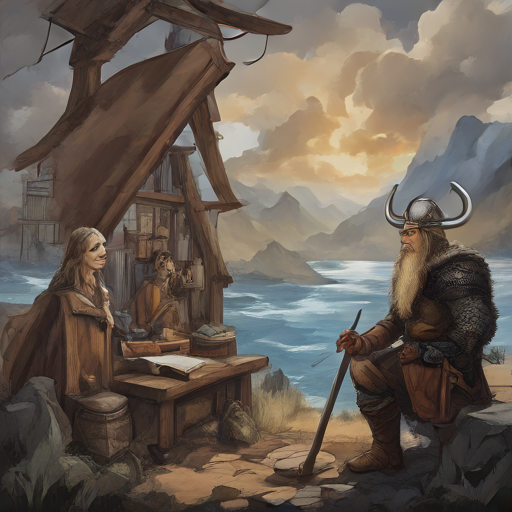

In lands of old, where tales unfold,
The mighty Vikings once stood tall.
With fierce warriors and fierce hearts,
They sailed across the seas, leaving their marks.

  Their ships, like giants on water's stage,
Carried them far and wide, across the waves.
With swords sharp as lightning's strike,
They fought battles fierce, never to be swayed.

  Their homes were castles upon hills,
Built strong and tall, where they stood.
With fire in their eyes and courage in their soul,
They faced their foes, never to be sold.

  Their legacy lives on in our hearts,
A tale of bravery and strength that never parts.
For though they're gone, their spirit remains,
A reminder that we too can rise above our pains.

  So let us remember the Vikings' might,
And let their courage guide us through the night.
For in their stories lies a lesson for us all,
To never fear the unknown, but to face it with a smile.

  And so we honor their memory,
And let their legacy shine bright.
For in their bravery lies our own st

In [18]:
# We will use the audio response from a couple of cells back.
completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=audio_response["data"],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={
        "system_message": SYSTEM_MESSAGE,
        "audio_format": "wav",
        "voice": "DukeNukem",
    },
)

response_text = completion.choices[0].text
display_content(response_text)